# Train

We trained our model using the GPU free tier on Kaggle for approximately 12 hours, completing 8,000 epochs. Due to Kaggle's runtime limit, we had to stop the training, download the model, restart the runtime, and continue training for an additional 7,000 epochs. 

As a result, our training notebook is divided into two distinct chunks. In the first chunk, epsilon starts at 1 and decays slowly. In the second chunk, we set epsilon to 0.20 initially and apply a faster decay to accelerate convergence. Consequently, we have two separate plots showing the training progress. 

The X-axis represents the iteration number divided by 10, and the Y-axis tracks the average reward over the last 100 games.


In [16]:
import torch
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from breakout import DQNBreakout
from agent import Agent
from model import AtariNet

cuda:0


<ipython-input-3-503215d32658>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(weights_filename))


NO FILE
starting epsilon is 1.0
epsilon decay is 0.999334


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


epoch: 10 - Episode Ret: -4.0 - Epsilon : 0.9933599246122866
epoch: 20 - Episode Ret: -3.0 - Epsilon : 0.9867639398257277
epoch: 30 - Episode Ret: -5.0 - Epsilon : 0.9802117528754078
epoch: 40 - Episode Ret: -3.0 - Epsilon : 0.9737030729403925
epoch: 50 - Episode Ret: -5.0 - Epsilon : 0.9672376111308202
epoch: 60 - Episode Ret: -5.0 - Epsilon : 0.9608150804750798
epoch: 70 - Episode Ret: -5.0 - Epsilon : 0.9544351959070733
epoch: 80 - Episode Ret: -4.0 - Epsilon : 0.9480976742535636
epoch: 90 - Episode Ret: -2.0 - Epsilon : 0.9418022342216044
epoch: 100 - Episode Ret: -3.0 - Epsilon : 0.9355485963860563
epoch: 110 - Avg Ret: -3.94 - Epsilon : 0.9293364831771835
epoch: 120 - Avg Ret: -4.03 - Epsilon : 0.9231656188683349
epoch: 130 - Avg Ret: -4.01 - Epsilon : 0.9170357295637042
epoch: 140 - Avg Ret: -4.0 - Epsilon : 0.9109465431861744
epoch: 150 - Avg Ret: -3.95 - Epsilon : 0.9048977894652416
epoch: 160 - Avg Ret: -3.93 - Epsilon : 0.8988891999250174
epoch: 170 - Avg Ret: -3.99 - Epsilo

{'Returns': [-4.0,
  -2.0,
  -4.0,
  -2.0,
  -4.0,
  -4.0,
  -5.0,
  -4.0,
  -5.0,
  -4.0,
  -1.0,
  -4.0,
  -2.0,
  -3.0,
  -5.0,
  -5.0,
  -3.0,
  -2.0,
  -5.0,
  -3.0,
  -5.0,
  -1.0,
  -3.0,
  -5.0,
  -4.0,
  -4.0,
  -5.0,
  -3.0,
  -4.0,
  -5.0,
  -4.0,
  -4.0,
  -5.0,
  -3.0,
  -5.0,
  -3.0,
  -5.0,
  -4.0,
  -4.0,
  -3.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -4.0,
  -5.0,
  -3.0,
  -5.0,
  -5.0,
  -5.0,
  -4.0,
  -5.0,
  -3.0,
  -5.0,
  -5.0,
  -4.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -2.0,
  -5.0,
  -3.0,
  0.0,
  -4.0,
  -4.0,
  -4.0,
  -5.0,
  -5.0,
  -4.0,
  -5.0,
  -5.0,
  -2.0,
  -4.0,
  -2.0,
  -4.0,
  -4.0,
  -5.0,
  -4.0,
  -3.0,
  -4.0,
  -2.0,
  -4.0,
  -3.0,
  -3.0,
  -3.0,
  -4.0,
  -5.0,
  -2.0,
  -5.0,
  -4.0,
  -3.0,
  -5.0,
  -4.0,
  -5.0,
  -4.0,
  -4.0,
  -3.0,
  -3.0,
  -5.0,
  -5.0,
  -5.0,
  -4.0,
  -2.0,
  -4.0,
  -3.0,
  -3.0,
  -4.0,
  -5.0,
  -4.0,
  -4.0,
  -5.0,
  -4.0,
  -3.0,
  -4.0,
  -3.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -4.0,
  -3.0,
  -3.0

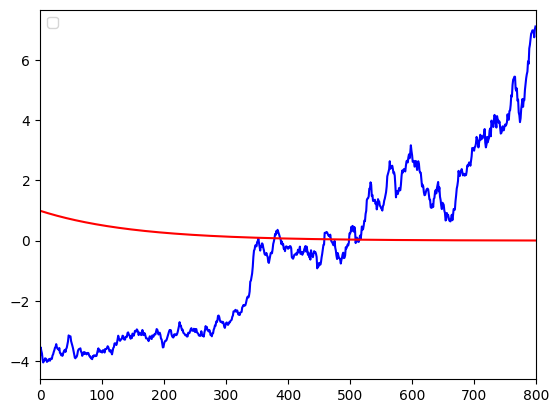

In [ ]:

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

environment = DQNBreakout(device=device)

model = AtariNet(nb_actions=4)
model.to(device)
model.load_the_model()

agent = Agent(model=model,
              device=device,
              nb_warmup=3000,
              epsilon=1.0,
              nb_actions=4,
              learning_rate=0.000001,
              memory_capacity=10000,
              batch_size=128)

agent.train(env=environment, epochs=8000)

In [ ]:
model = AtariNet(nb_actions=4)
model.to(device)
model.load_the_model('/kaggle/input/model_iter_8000/pytorch/default/1/model_iter_8000.pt')

agent = Agent(model=model,
              device=device,
              nb_warmup=1000,
              epsilon=0.2,
              nb_actions=4,
              learning_rate=0.000001,
              memory_capacity=10000,
              batch_size=128)

agent.train(env=environment, epochs=10000)

cuda:0
Successfully loaded weights file /kaggle/input/model_iter_8000/pytorch/default/1/model_iter_8000.pt
starting epsilon is 0.2
epsilon decay is 0.99960002
epoch: 10 - Episode Ret: -2.0 - Epsilon : 0.19920147832130855
epoch: 20 - Episode Ret: 2.0 - Epsilon : 0.19840614482697375
epoch: 30 - Episode Ret: 5.0 - Epsilon : 0.19761398678782405
epoch: 40 - Episode Ret: 7.0 - Epsilon : 0.1968249915255104
epoch: 50 - Episode Ret: 5.0 - Epsilon : 0.19603914641230347
epoch: 60 - Episode Ret: -2.0 - Epsilon : 0.1952564388708915
epoch: 70 - Episode Ret: 2.0 - Epsilon : 0.19447685637417897
epoch: 80 - Episode Ret: -1.0 - Epsilon : 0.1937003864450862
epoch: 90 - Episode Ret: 1.0 - Epsilon : 0.1929270166563496
epoch: 100 - Episode Ret: 0.0 - Epsilon : 0.19215673463032276
epoch: 110 - Avg Ret: 2.59 - Epsilon : 0.1913895280387784
epoch: 120 - Avg Ret: 2.71 - Epsilon : 0.19062538460271095
epoch: 130 - Avg Ret: 2.8 - Epsilon : 0.18986429209214015
epoch: 140 - Avg Ret: 2.53 - Epsilon : 0.189106238325915

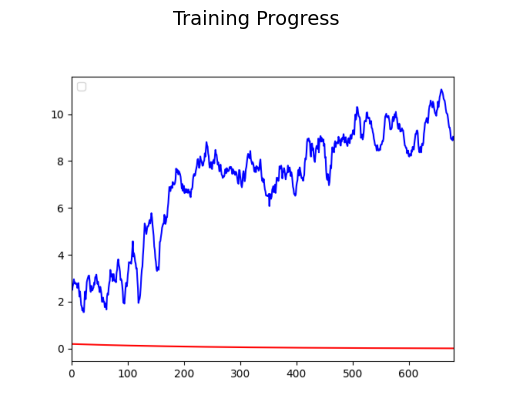

In [15]:
image = mpimg.imread("plots/plot_14000.png")

plt.imshow(image)
plt.title("Training Progress", fontsize=14) 
plt.axis('off') 
plt.show()  